In [39]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import Dataset
import pandas as pd
import numpy as np
import json

In [2]:
ds = Dataset.from_json("../src/influential_samples_top5.json")

Generating train split: 100 examples [00:00, 2590.40 examples/s]


In [3]:
ds

Dataset({
    features: ['Validation Sample', 'Most Influential Training Samples', 'Least Influential Training Samples'],
    num_rows: 100
})

In [4]:
ds[1]['Least Influential Training Samples']["input"]

['', '', '', '', '']

In [5]:
data = []
for d in ds:
    dict_ = {}
    dict_["Validation Sample"] = d["Validation Sample"]["prompt"]
    dict_["top_influencing"] = [instr + "\n" + input_ for instr, input_ in zip(d['Most Influential Training Samples']["instruction"], d['Most Influential Training Samples']["input"])]
    dict_["top_influencing_sources"] = ["medqa" if len(input_) else "open-platypus" for input_ in d['Most Influential Training Samples']["input"]]
    dict_["least_influencing"] = [instr + "\n" + input_ for instr, input_ in zip(d['Least Influential Training Samples']["instruction"], d['Least Influential Training Samples']["input"])]
    dict_["least_influencing_sources"] = ["medqa" if len(input_) else "open-platypus" for input_ in d['Least Influential Training Samples']["input"]]
    data.append(dict_)



In [6]:
df = pd.DataFrame(data)
df

,Validation Sample,top_influencing,top_influencing_sources,least_influencing,least_influencing_sources
0,Question: A 6-year-old African American boy is...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 14, 2022...","[open-platypus, open-platypus, open-platypus, ..."
1,Question: A 28-year-old male presents with a r...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 14, 2022...","[open-platypus, open-platypus, open-platypus, ..."
2,Question: A 66-year-old woman presents with ur...,"[What is quantum physics?\n, Compute $\cos 135...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 14, 2022...","[open-platypus, open-platypus, open-platypus, ..."
3,Question: A 45-year-old woman presents with su...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 15, 2021...","[open-platypus, open-platypus, open-platypus, ..."
4,Question: A 4-week-old female newborn is broug...,[You are a medical doctor taking the US Medica...,"[medqa, open-platypus, open-platypus, open-pla...","[BEGININPUT\nBEGINCONTEXT\ndate: June 15, 2021...","[open-platypus, open-platypus, open-platypus, ..."
...,...,...,...,...,...
95,Question: A 10-year-old boy is brought to the ...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 14, 2022...","[open-platypus, open-platypus, open-platypus, ..."
96,Question: A 32-year-old woman presents to the ...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 15, 2021...","[open-platypus, open-platypus, open-platypus, ..."
97,"Question: A 24-year-old man, who recently migr...",[Does this passage describe the weather or the...,"[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 14, 2022...","[open-platypus, open-platypus, open-platypus, ..."
98,Question: A healthy 23-year-old male is underg...,"[What is quantum physics?\n, Find $\cot 90^\ci...","[open-platypus, open-platypus, open-platypus, ...","[BEGININPUT\nBEGINCONTEXT\ndate: June 15, 2021...","[open-platypus, open-platypus, open-platypus, ..."


In [33]:
def plot(tokens_lists, title="Distribution of Tokenized Input IDs Lengths"):
    # Determine the min and max lengths
    min_length = min(tokens_lists)
    max_length = max(tokens_lists)

    # Choose a bin width or determine the number of bins
    # Here, we choose a bin width that gives a readable histogram
    bin_width = (max_length - min_length) // 20  # Adjust this to change the granularity of the histogram

    # Create bins from min to max length with the chosen bin width
    bins = range(min_length, max_length + bin_width, bin_width)

    # Plotting the histogram with specified bins
    plt.figure(figsize=(10, 6))
    plt.hist(tokens_lists, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Length of Tokenized Input IDs')
    plt.ylabel('Frequency')
    plt.xticks(bins)  # Adjust x-axis labels to match the bins for readability
    plt.grid(axis='y', alpha=0.75)

    plt.show()


In [34]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")

In [35]:
top_sentences = df["top_influencing"].values
top_sentences = sum(top_sentences, [])
top_sentences_tokenized = tokenizer(top_sentences)["input_ids"]
top_sentences_tokenized_len = [len(sample) for sample in top_sentences_tokenized]


least_sentences = df["least_influencing"].values
least_sentences = sum(least_sentences, [])
least_sentences_tokenized = tokenizer(least_sentences)["input_ids"]
least_sentences_tokenized_len = [len(sample) for sample in least_sentences_tokenized]


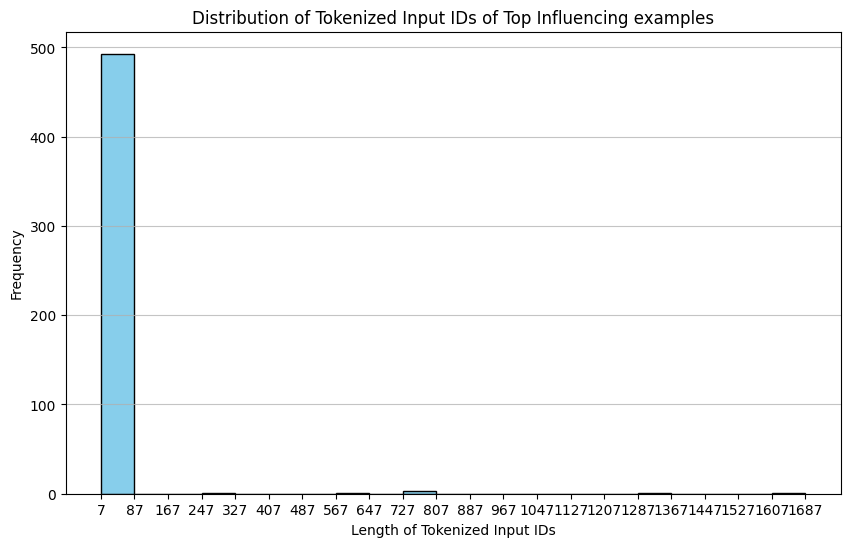

In [36]:
plot(top_sentences_tokenized_len, title = "Distribution of Tokenized Input IDs of Top Influencing examples")

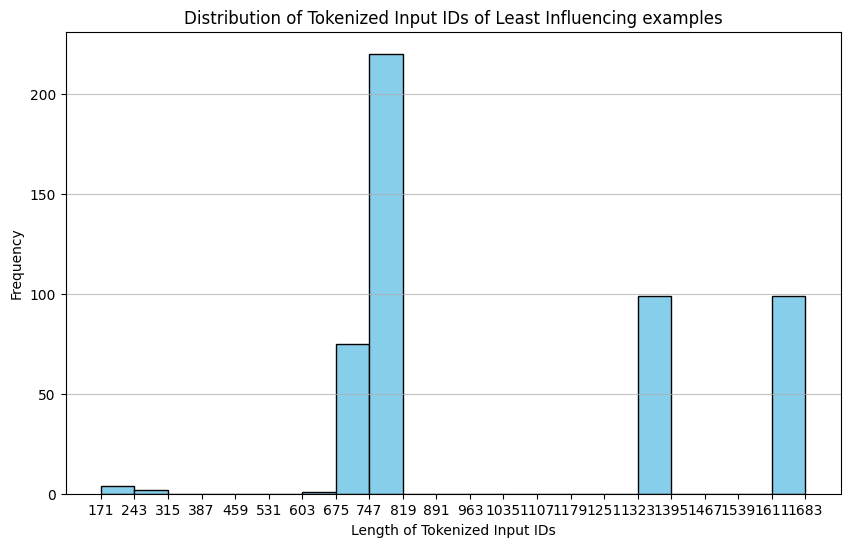

In [37]:
plot(least_sentences_tokenized_len, title = "Distribution of Tokenized Input IDs of Least Influencing examples")

In [42]:
text_counts = Counter(top_sentences)
for text, count in text_counts.items():
    print(f"{count} : {text[:500]}")

99 : What is quantum physics?

99 : Find $\cot 90^\circ.$

98 : Compute $\cos 135^\circ$.

95 : In how many ways can I arrange four different books on a shelf?

88 : How many of the positive divisors of 252 are even?

11 : Compute $\arcsin 0.$  Express your answer in radians.

1 : You are a medical doctor taking the US Medical Licensing Examination. You need to demonstrate your understanding of basic and clinical science, medical knowledge, and mechanisms underlying health, disease, patient care, and modes of therapy. Show your ability to apply the knowledge essential for medical practice. For the following multiple-choice question, select one correct answer from A to E.
Question: Three days after undergoing coronary artery bypass surgery, a 72-year-old man has severe rig
1 : You are a medical doctor taking the US Medical Licensing Examination. You need to demonstrate your understanding of basic and clinical science, medical knowledge, and mechanisms underlying health, disease, patient

In [44]:
text_counts = Counter(least_sentences)
for text, count in text_counts.items():
    print(f"{count} : {text[:100]} ....")

99 : BEGININPUT
BEGINCONTEXT
date: June 14, 2022
author: Lila Thompson
title: The Case of the Vanishing A ....
99 : BEGININPUT
BEGINCONTEXT
date: June 15, 2021
author: Emily Hawthorne
title: Baking: Science and Art C ....
95 : Given a list of `words`, list of single `letters` (might be repeating) and `score` of every characte ....
80 : BEGININPUT
BEGINCONTEXT
date: June 15, 2023
author: Dr. Jane Smith
repository: https://github.com/hu ....
72 : You are given two positive integer arrays `nums1` and `nums2`, both of length `n`.

The **absolute s ....
44 : BEGININPUT
BEGINCONTEXT
date: October 12, 2019
author: Dr. Amelia Thompson
title: The Impact of Tele ....
3 : BEGININPUT
BEGINCONTEXT
date: September 15, 2023
author: Dr. Jane Smith
url: https://www.nutrition-s ....
1 : You are a medical doctor taking the US Medical Licensing Examination. You need to demonstrate your u ....
1 : What is the average student headcount for the spring terms of the `02-`03, `03-`04 and `04-`05 acade ....
1 : 

In [48]:
text_counts = Counter(sum(df["least_influencing_sources"].values , []))
for text, count in text_counts.items():
    print(f"{count} : {text}")

493 : open-platypus
7 : medqa


In [49]:
text_counts = Counter(sum(df["top_influencing_sources"].values , []))
for text, count in text_counts.items():
    print(f"{count} : {text}")

498 : open-platypus
2 : medqa


In [ ]:
n_tokens_top = []


In [58]:
df["top_influencing_sources"].value_counts()

top_influencing_sources
[open-platypus, open-platypus, open-platypus, open-platypus, open-platypus]    59
[medqa, medqa, medqa, medqa, medqa]                                            32
[medqa, medqa, medqa, open-platypus, medqa]                                     3
[medqa, medqa, open-platypus, medqa, medqa]                                     2
[medqa, medqa, open-platypus, medqa, open-platypus]                             1
[open-platypus, medqa, medqa, medqa, medqa]                                     1
[medqa, open-platypus, medqa, medqa, medqa]                                     1
[medqa, open-platypus, medqa, open-platypus, medqa]                             1
Name: count, dtype: int64

In [59]:
df["least_influencing_sources"].value_counts()

least_influencing_sources
[open-platypus, open-platypus, open-platypus, open-platypus, open-platypus]    11
[open-platypus, open-platypus, medqa, open-platypus, open-platypus]             8
[medqa, open-platypus, open-platypus, open-platypus, open-platypus]             7
[open-platypus, medqa, open-platypus, open-platypus, medqa]                     6
[open-platypus, medqa, open-platypus, open-platypus, open-platypus]             6
[medqa, open-platypus, medqa, open-platypus, open-platypus]                     6
[open-platypus, open-platypus, open-platypus, open-platypus, medqa]             5
[medqa, medqa, medqa, open-platypus, medqa]                                     5
[open-platypus, medqa, medqa, medqa, medqa]                                     4
[medqa, medqa, open-platypus, open-platypus, open-platypus]                     3
[open-platypus, open-platypus, medqa, medqa, open-platypus]                     3
[open-platypus, open-platypus, open-platypus, medqa, open-platypus]     

In [41]:
ds_ = Dataset.from_json("../datasets/medical_datasets/open-platypus_medqa-instruction-train_merged.json")

Generating train split: 400 examples [00:00, 75719.71 examples/s]


In [43]:
ds_

Dataset({
    features: ['output', 'instruction', 'input'],
    num_rows: 400
})

In [51]:
df.to_csv("influencing_examples_no_prompt.csv")

In [3]:
ds[0]["Validation Sample"]["prompt"]

"Question: A 6-year-old African American boy is referred to the hospital by his family physician for jaundice, normocytic anemia, and severe bone pain. He has a history of several episodes of mild bone pain in the past treated with over the counter analgesics. On physical examination, the child is icteric with nonspecific pain in his hands. His hands are swollen, tender, and warm. There is no chest pain, abdominal pain, fever, or hematuria. A complete metabolic panel and complete blood count with manual differential are performed:\nTotal bilirubin\n8.4 mg/dL\nWBC\n9,800/mm3\nHemoglobin \n6.5 g/dL\nMCV 82.3 fL\nPlatelet count  465,000/mm3\nReticulocyte 7%\nPeripheral blood smear shows multiple clumps of elongated and curved cells and erythrocytes with nuclear remnant. The patient's hemoglobin electrophoresis result is pictured below. What is the most likely cause of his condition?\n(A) Sickle cell trait (B) Sickle cell disease (C) Hemoglobin F (D) HbC\nAnswer:"

In [4]:
ds[0]["Most Influential Training Samples"]

{'output': ['Quantum physics is a branch of physics that deals with the behavior of matter and energy at the atomic and subatomic level. It is also known as quantum mechanics, and it describes the fundamental nature of particles that make up our universe, including atoms, electrons, photons, and other subatomic particles.\n\nIn classical physics, the behavior of matter and energy can be predicted with great accuracy, but this is not the case in the quantum world. In quantum mechanics, particles do not have a definite position or momentum until they are observed, and their behavior is described by a wave function that gives the probability of finding a particle at a particular location. This means that particles can exist in multiple states at the same time, and their behavior can be influenced by the act of observation.\n\nQuantum physics has led to many important technological advancements, including the development of transistors, lasers, and superconductors. It has also led to a dee